# Procesamiento de Imagenes

### ¿Cómo se Obtienen los datos?
A continuación, se muestran los datos obtenidos de la galaxia andromeda tomados de:
http://cdsportal.u-strasbg.fr/?target=andromeda

In [4]:
from matplotlib import pyplot as plt
from astropy.io import fits
import bz2
import numpy as np

with fits.open('Data/m31_sdss_obs_flux_attcorr_nomask_r.fit') as hdul:
    hdul.info() 

Filename: Data/m31_sdss_obs_flux_attcorr_nomask_r.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      59   (2300, 7400)   float32   


### Graficando información cruda

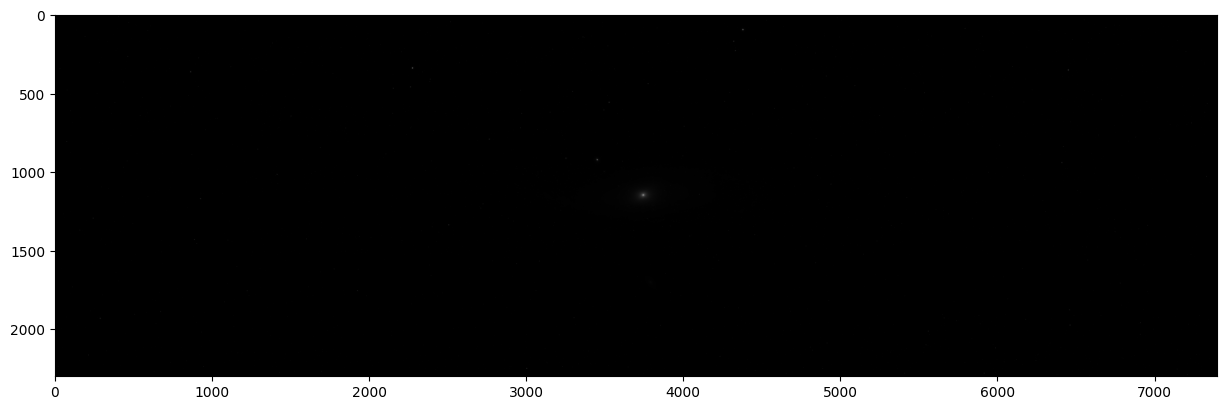

In [5]:
hdul = fits.open('Data/m31_sdss_obs_flux_attcorr_nomask_r.fit')
image_data = hdul[0].data
hdul.close()
plt.figure(figsize=(15,15))
plt.imshow(image_data.T, cmap='gray')
plt.show()

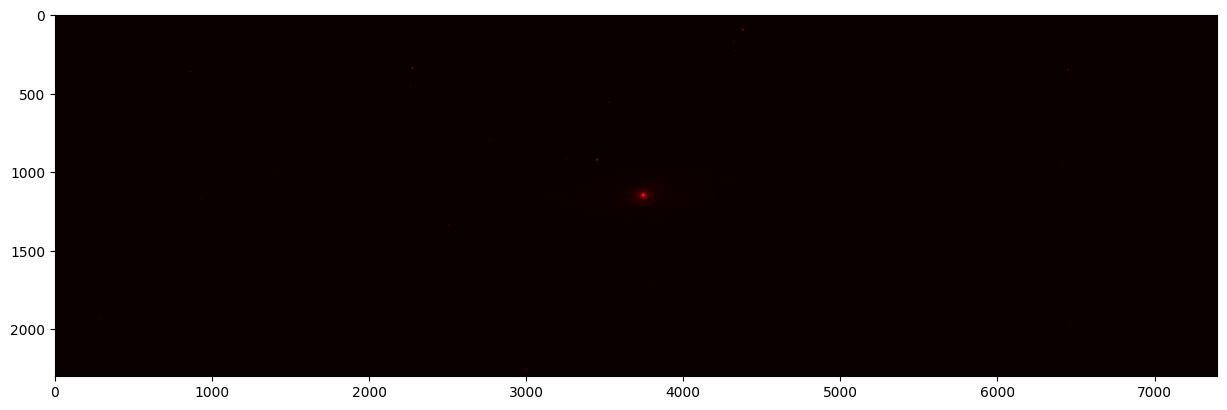

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(image_data.T, cmap='hot')
plt.show()

#### Normalización
Es necesario realizar una normalización de los datos para poder observar mejor las diferencias entre los datos registados.

Se pueden normalizar los datos en escala logaritmica de la forma:

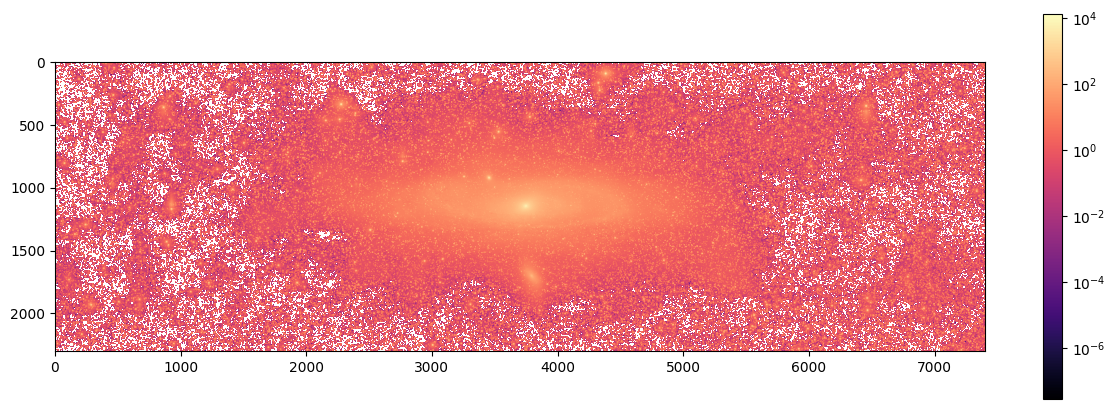

In [8]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(15,5))
plt.imshow(image_data.T, cmap='magma', norm=LogNorm())
plt.colorbar()
plt.show()

Se puede evidenciar la presencia de ruido en las imágenes, por lo tanto, es necesario revisar los datos:

In [29]:
image_data

array([[-1.74176410e-01, -3.42591822e-01, -4.47588742e-01, ...,
         1.53360935e-02, -6.94026500e-02, -1.05542384e-01],
       [-8.95968303e-02,  4.16028872e-02, -7.95166865e-02, ...,
         3.08462828e-01, -1.74805447e-02,  3.27246487e-01],
       [-2.74676122e-02,  2.38904372e-01,  3.01361799e-01, ...,
        -6.34999931e-01, -3.53697618e-03,  7.25125074e-01],
       ...,
       [ 3.21048212e+00, -6.62057340e-01, -8.03315733e-03, ...,
         1.25122890e-01, -1.81493089e-01,  9.38122272e-01],
       [ 1.92710519e-01, -7.20745921e-01, -1.34178013e-01, ...,
         3.89773697e-01,  4.43804801e-01,  9.37658027e-02],
       [ 1.95140481e+00, -2.45626569e-02, -3.94979149e-01, ...,
         3.67988892e+01,  1.31365669e+00,  1.60302550e-01]], dtype=float32)

Para evitar los valores negativos, se normaliza restando el valor menor:

In [33]:
image_data_New = image_data - np.min(image_data)

Ya sin el ruido, se puede graficar mejor:

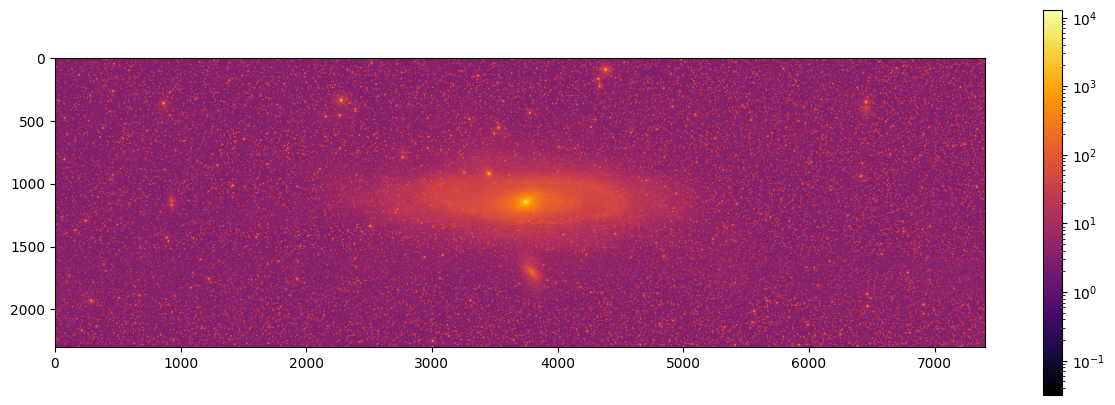

In [37]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(15,5))
plt.imshow(image_data_New.T, cmap='inferno', norm=LogNorm())
plt.colorbar()
plt.show()

## ¿Cómo obtener el color en las imágenes?
Se puede observar que este no es el color real de la galaxia

Para ello se usa una composición de color según los filtros *r, g, i, u* en este caso, para ello se usa la librería **visualizaton.make_lupton_rgb** de *astropy*:

In [48]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.visualization import make_lupton_rgb

ifile = fits.open('Data/m31_sdss_obs_flux_attcorr_nomask_i.fit')
rfile = fits.open('Data/m31_sdss_obs_flux_attcorr_nomask_r.fit')
gfile = fits.open('Data/m31_sdss_obs_flux_attcorr_nomask_g.fit')
ufile = fits.open('Data/m31_sdss_obs_flux_attcorr_nomask_u.fit')

i = ifile[0].data
r = rfile[0].data
g = gfile[0].data
u = ufile[0].data

#### Haciendo una composición RGB

Para este caso se toman los datos de los filtro r, g y u como valores de referencia para los colores RGB.

In [53]:
RGB1 = make_lupton_rgb(r.T, g.T, u.T,stretch=40, Q=20)

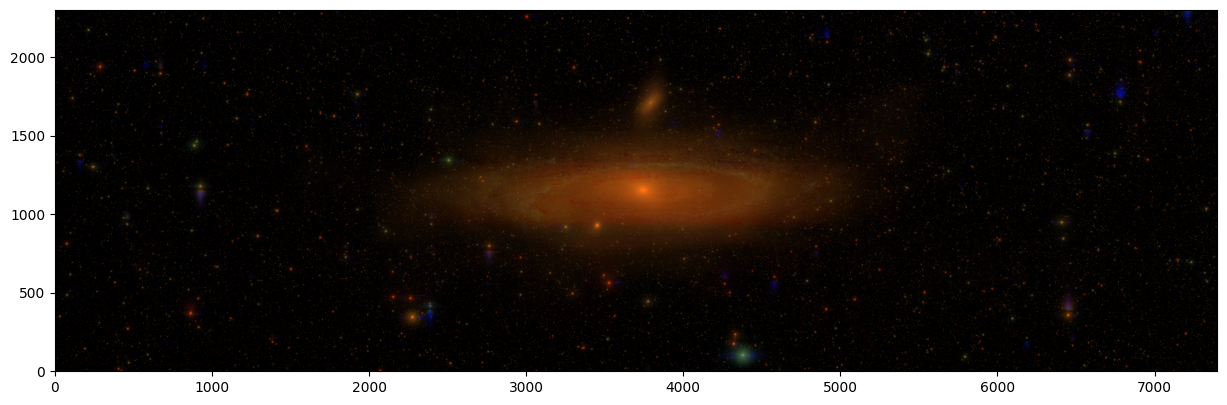

In [52]:
plt.figure(figsize=(15,15))
plt.imshow(RGB1, origin='lower')
plt.show()

#### Haciendo una composición RGB = *irg*

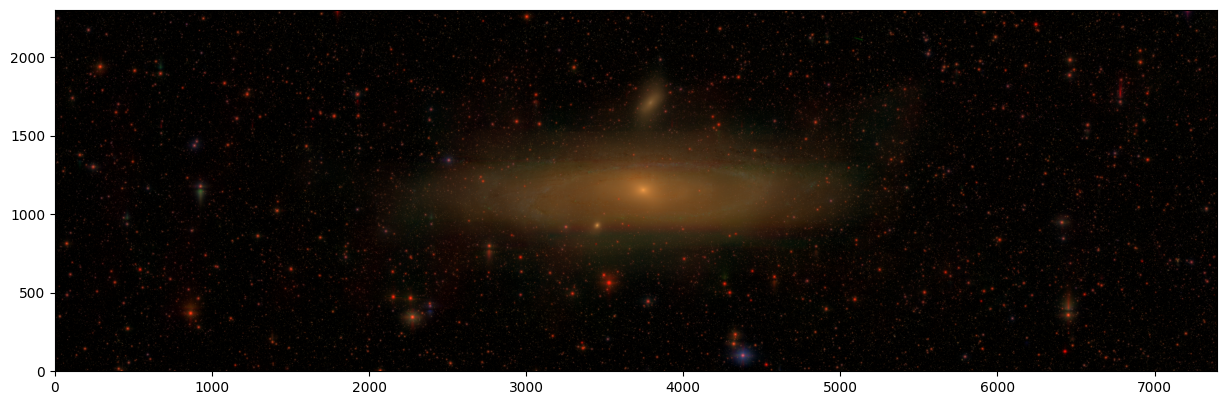

In [55]:
RGB2 = make_lupton_rgb(i.T, r.T, g.T,stretch=40, Q=20)

plt.figure(figsize=(15,15))
plt.imshow(RGB2, origin='lower')
plt.show()

In [112]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.visualization import make_lupton_rgb

ifile_comp = bz2.BZ2File("Data/frame-i-004381-2-0114.fits.bz2")
ifile = fits.open(ifile_comp)

rfile_comp = bz2.BZ2File("Data/frame-r-004381-2-0114.fits.bz2")
rfile = fits.open(rfile_comp)

gfile_comp = bz2.BZ2File("Data/frame-g-004381-2-0114.fits.bz2")
gfile = fits.open(gfile_comp)

ufile_comp = bz2.BZ2File("Data/frame-u-004381-2-0114.fits.bz2")
ufile = fits.open(ufile_comp)

iM88 = ifile[0].data*10
rM88 = rfile[0].data*10
gM88 = gfile[0].data*10
uM88 = ufile[0].data*10

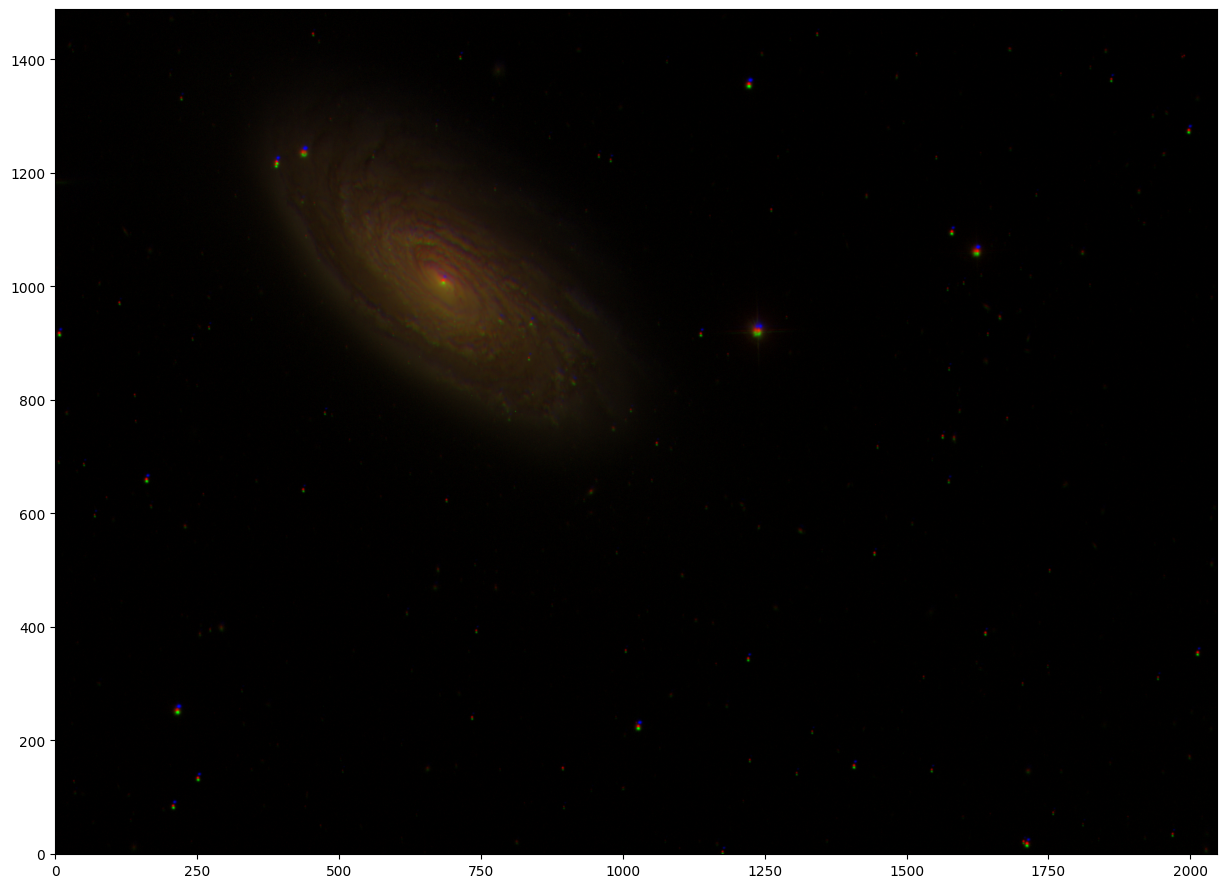

In [113]:
RGB = make_lupton_rgb(iM88, rM88, gM88, stretch=50, Q=20)
plt.figure(figsize=(15,15))
plt.imshow(RGB, origin='lower')
plt.show()

In [114]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.visualization import make_lupton_rgb

i3 = fits.open('Data/NGC123i.fits')
r3 = fits.open('Data/NGC123r.fits')
g3 = fits.open('Data/NGC123g.fits')
u3 = fits.open('Data/NGC123u.fits')

iM81 = i3[0].data
rM81 = r3[0].data
gM81 = g3[0].data
uM81 = u3[0].data

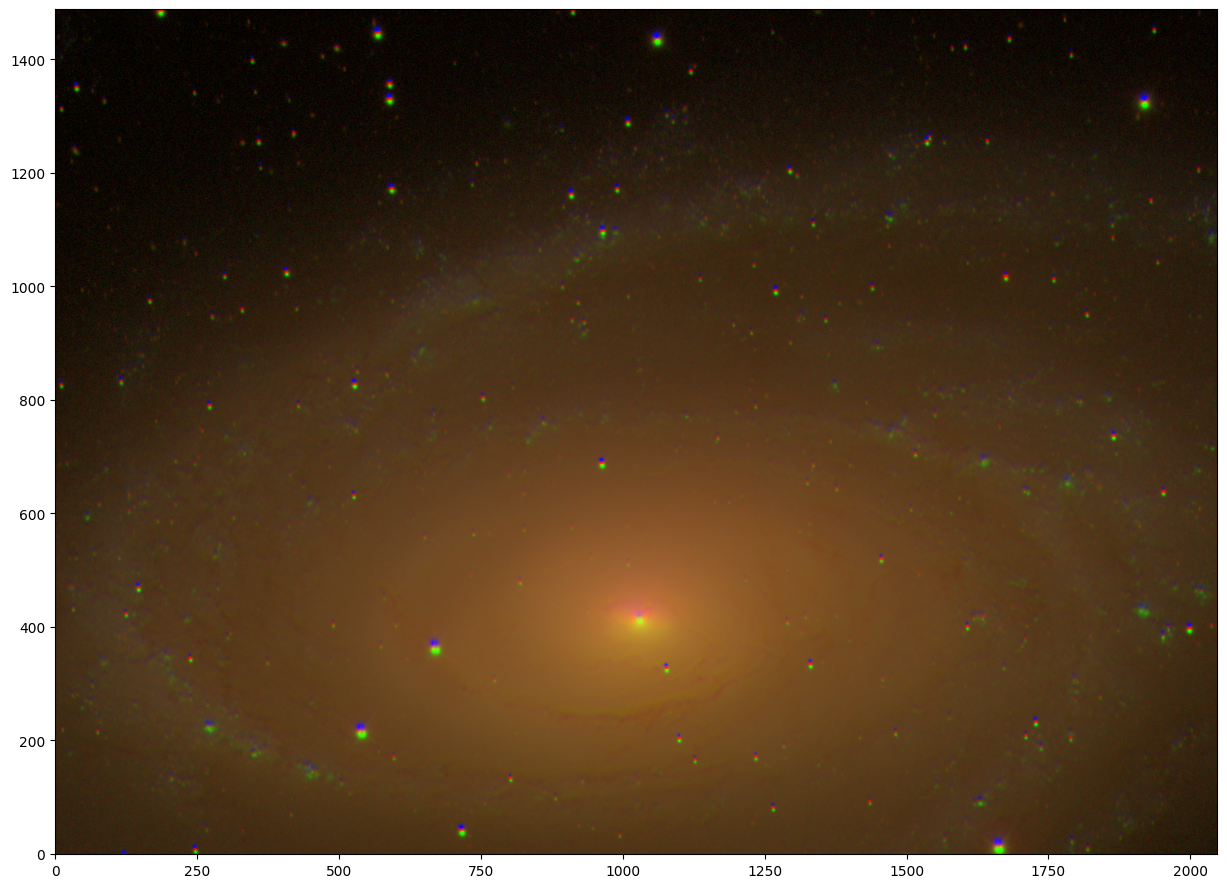

In [115]:
rgb_default = make_lupton_rgb(iM81, rM81, gM81, stretch=0.8, Q=18)

plt.figure(figsize=(15,15))
plt.imshow(rgb_default, origin='lower')
plt.show()